In [1]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("fcc-forum-pageviews.csv", index_col="date", parse_dates=True)

# View the first few rows
df.head()


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


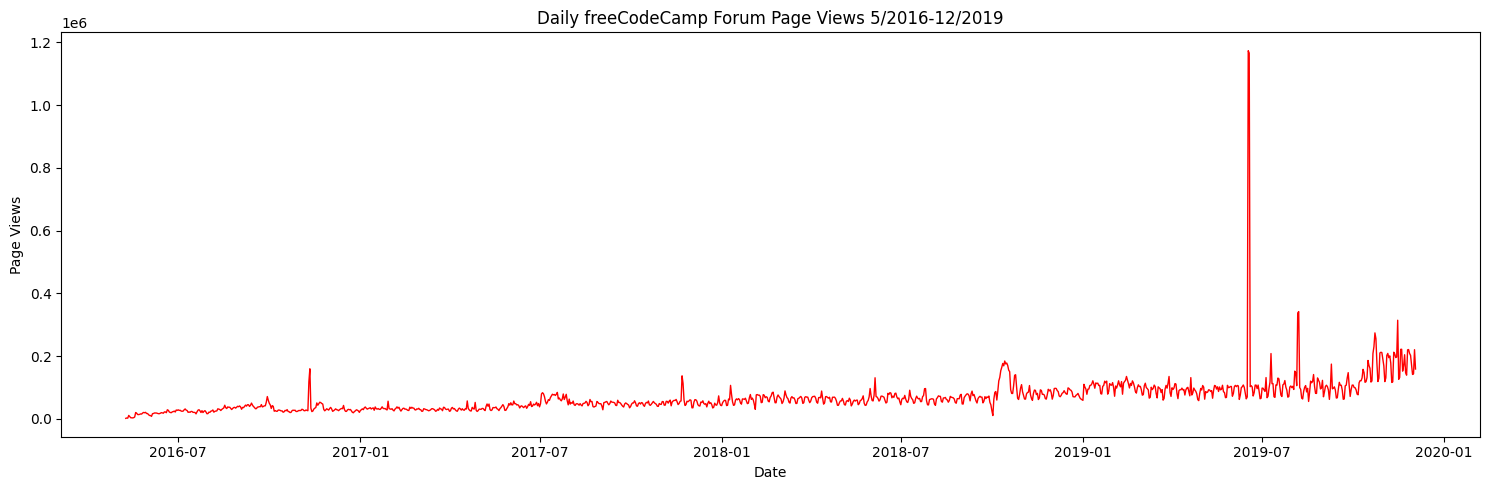

In [3]:
import matplotlib.pyplot as plt

def draw_line_plot():
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df.index, df['value'], color='red', linewidth=1)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    plt.tight_layout()
    plt.show()

draw_line_plot()


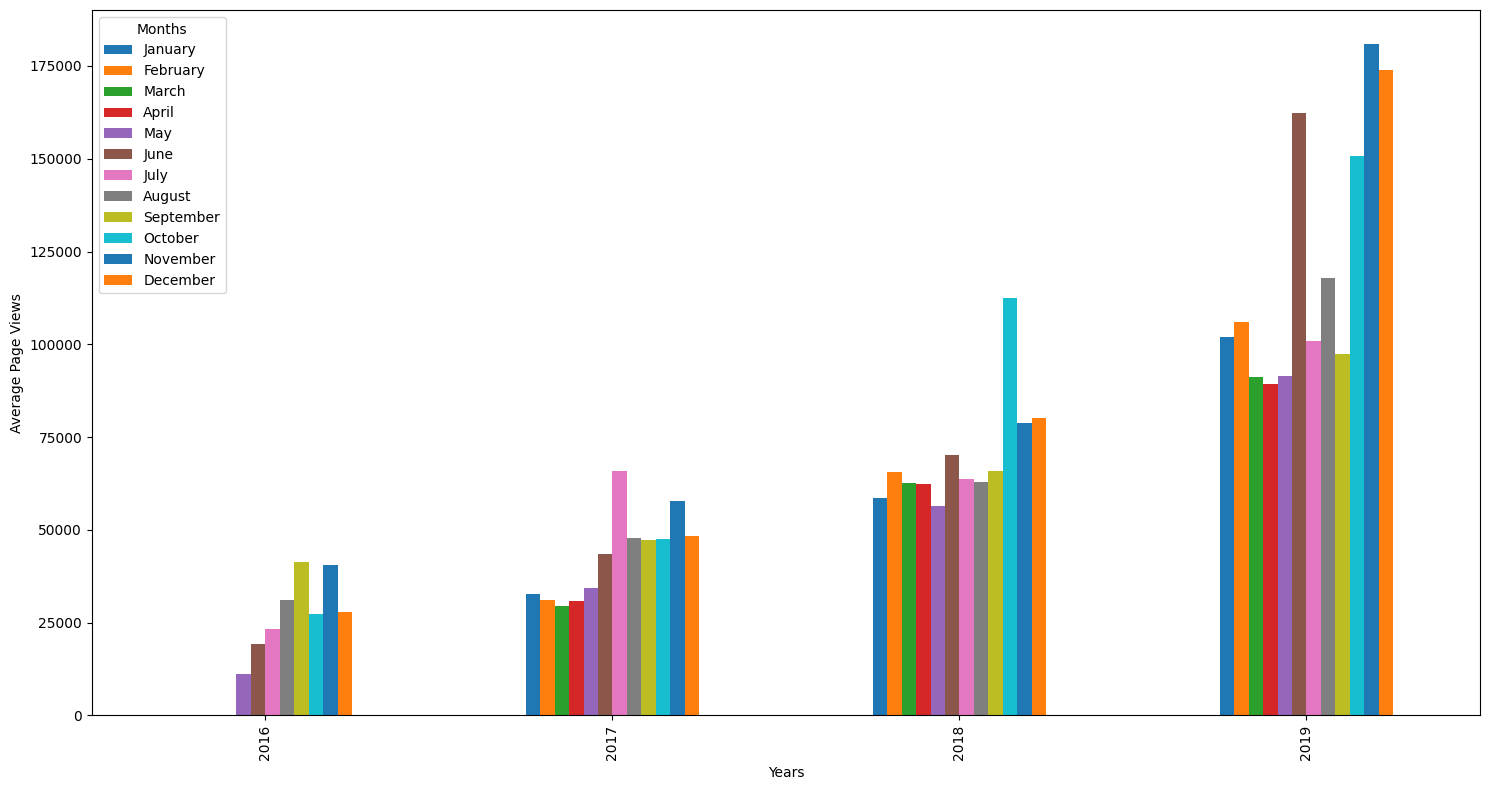

In [4]:
def draw_bar_plot():
    # Copy and prepare data
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()

    # Create pivot table: average value by year and month
    df_grouped = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Reorder months properly
    ordered_months = [
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ]
    df_grouped = df_grouped[ordered_months]

    # Plot
    fig = df_grouped.plot(kind='bar', figsize=(15, 8)).figure
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.legend(title="Months")
    plt.tight_layout()
    plt.show()

draw_bar_plot()


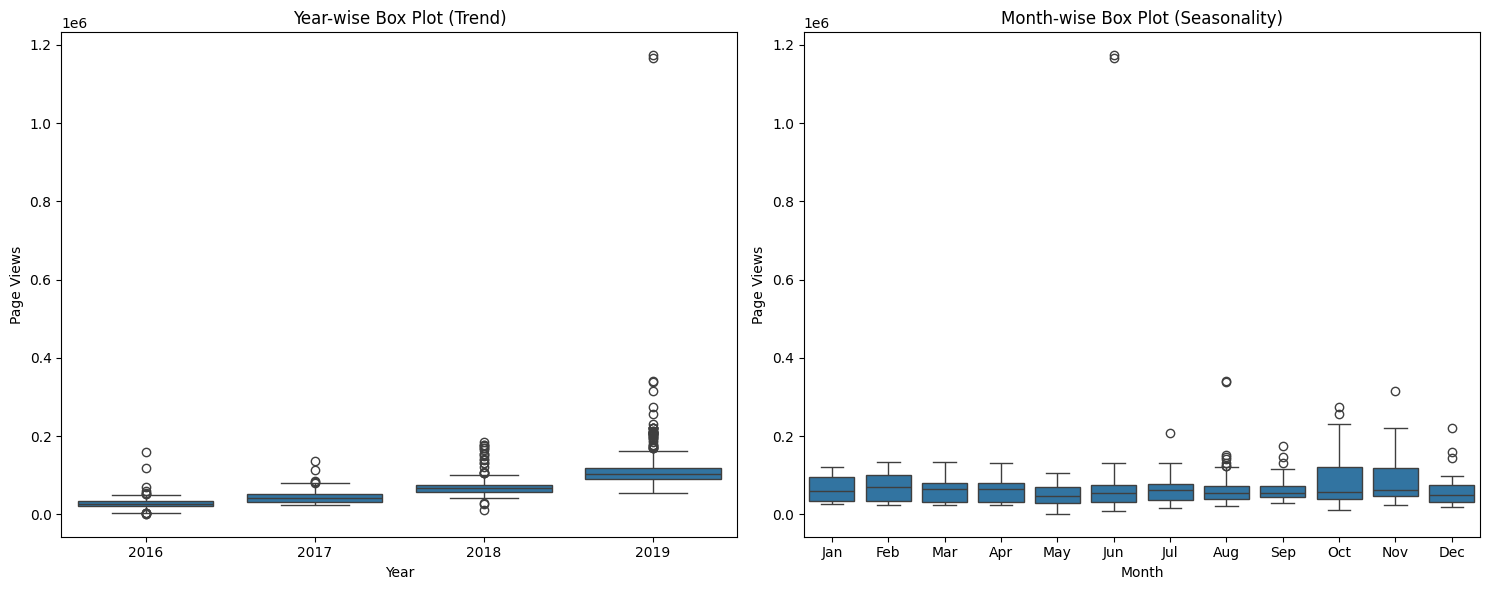

In [5]:
import seaborn as sns

def draw_box_plot():
    # Prepare data
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    df_box['month_num'] = df_box['date'].dt.month

    # Sort by month number to display Jan–Dec properly
    df_box = df_box.sort_values('month_num')

    # Create figure with 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Year-wise Box Plot (Trend)
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    # Month-wise Box Plot (Seasonality)
    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    plt.tight_layout()
    plt.show()

draw_box_plot()
